<a href="https://colab.research.google.com/github/flatlalejo1982/Phase-4-Project-Execution/blob/main/Phase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Phase 4 Project Execution**

In [4]:
#Load core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1.Data Preparation**

In [5]:
#Load Data

data = pd.read_csv("airdata.csv", sep = ",")
data.head()

,date,Station code,Address,Latitude,Longitude,SO2,NO2,CO,O3,PM2.5,PM10
0,1/1/2017 0:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.059,1.2,0.0525,57,73
1,1/1/2017 1:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.058,1.2,0.0525,59,71
2,1/1/2017 2:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.056,1.2,0.0525,59,70
3,1/1/2017 3:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.056,1.2,0.0525,58,70
4,1/1/2017 4:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.03,0.051,1.2,0.0525,61,69


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155405 entries, 0 to 155404
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          155405 non-null  object 
 1   Station code  155405 non-null  int64  
 2   Address       155405 non-null  object 
 3   Latitude      155405 non-null  float64
 4   Longitude     155405 non-null  float64
 5   SO2           155405 non-null  float64
 6   NO2           155405 non-null  float64
 7   CO            155405 non-null  float64
 8   O3            155405 non-null  float64
 9   PM2.5         155405 non-null  int64  
 10  PM10          155405 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 13.0+ MB


In [7]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

**Calculation of the Air Quality Index (AQI) for various pollutants**




**Define the EPA ranges (in µg/m³ or ppm depending on the contaminant)**

In [8]:
#Create EPA range table
rangos = {
    "SO2": pd.DataFrame({
        'Bmin': [0, 36, 76, 186, 305, 605],
        'Bmax': [35, 75, 185, 304, 604, 1004],
        'Imin': [0, 51, 101, 151, 201, 301],
        'Imax': [50, 100, 150, 200, 300, 500],
        'Categoria': ['Good', 'Moderate', 'Harmful/sensitive Groups', 'Poor', 'Very Poor', 'Dangerous']
    }),
    "NO2": pd.DataFrame({
        'Bmin': [0, 54, 101, 361, 650, 1250],
        'Bmax': [53, 100, 360, 649, 1249, 2049],
        'Imin': [0, 51, 101, 151, 201, 301],
        'Imax': [50, 100, 150, 200, 300, 500],
        'Categoria': ['Good', 'Moderate', 'Harmful/sensitive Groups', 'Poor', 'Very Poor', 'Dangerous']
    }),
    "CO": pd.DataFrame({
        'Bmin': [0.0, 4.5, 9.5, 12.5, 15.5, 30.5],
        'Bmax': [4.4, 9.4, 12.4, 15.4, 30.4, 50.4],
        'Imin': [0, 51, 101, 151, 201, 301],
        'Imax': [50, 100, 150, 200, 300, 500],
        'Categoria': ['Good', 'Moderate', 'Harmful/sensitive Groups', 'Poor', 'Very Poor', 'Dangerous']
    }),
    "O3": pd.DataFrame({
        'Bmin': [0.000, 0.055, 0.071, 0.086, 0.106, 0.201],
        'Bmax': [0.054, 0.070, 0.085, 0.105, 0.200, 0.604],
        'Imin': [0, 51, 101, 151, 201, 301],
        'Imax': [50, 100, 150, 200, 300, 500],
        'Categoria': ['Good', 'Moderate', 'Harmful/sensitive Groups', 'Poor', 'Very Poor', 'Dangerous']
    }),
    "PM2.5": pd.DataFrame({
        'Bmin': [0.0, 12.1, 35.5, 55.5, 150.5, 250.5],
        'Bmax': [12.0, 35.4, 55.4, 150.4, 250.4, 500.4],
        'Imin': [0, 51, 101, 151, 201, 301],
        'Imax': [50, 100, 150, 200, 300, 500],
        'Categoria': ['Good', 'Moderate', 'Harmful/sensitive Groups', 'Poor', 'Very Poor', 'Dangerous']
    }),
    "PM10": pd.DataFrame({
        'Bmin': [0, 55, 155, 255, 355, 425],
        'Bmax': [54, 154, 254, 354, 424, 604],
        'Imin': [0, 51, 101, 151, 201, 301],
        'Imax': [50, 100, 150, 200, 300, 500],
        'Categoria': ['Good', 'Moderate', 'Harmful/sensitive Groups', 'Poor', 'Very Poor', 'Dangerous']
    }),
}

def calcular_aqi(Cp, contaminante):
    tabla = rangos[contaminante]
    for _, r in tabla.iterrows():
        if r.Bmin <= Cp <= r.Bmax:
            AQI = ((r.Imax - r.Imin) / (r.Bmax - r.Bmin)) * (Cp - r.Bmin) + r.Imin
            return round(AQI, 1), r.Categoria
    return None, "Fuera de rango"


In [9]:
# Calcular AQI para cada particula contaminante registrada
for contaminante in ["SO2", "NO2", "CO", "O3", "PM2.5", "PM10"]:
    data[f"AQI_{contaminante}"], data[f"Cat_{contaminante}"] = zip(*data[contaminante].apply(lambda x: calcular_aqi(x, contaminante)))

In [10]:
#  AQI total y contaminante dominante
aqi_cols = [f"AQI_{c}" for c in ["SO2", "NO2", "CO", "O3", "PM2.5", "PM10"]]
data["AQI_Total"] = data[aqi_cols].max(axis=1)
data["Dominante"] = data[aqi_cols].idxmax(axis=1).str.replace("AQI_", "")

In [11]:
# Mostrar los resultados
print("\n Resultados del cálculo del AQI:")
display(data.head())


 Resultados del cálculo del AQI:


,date,Station code,Address,Latitude,Longitude,SO2,NO2,CO,O3,PM2.5,...,AQI_CO,Cat_CO,AQI_O3,Cat_O3,AQI_PM2.5,Cat_PM2.5,AQI_PM10,Cat_PM10,AQI_Total,Dominante
0,1/1/2017 0:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.059,1.2,0.0525,57,...,13.6,Good,48.6,Good,151.8,Poor,59.9,Moderate,151.8,PM2.5
1,1/1/2017 1:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.058,1.2,0.0525,59,...,13.6,Good,48.6,Good,152.8,Poor,58.9,Moderate,152.8,PM2.5
2,1/1/2017 2:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.056,1.2,0.0525,59,...,13.6,Good,48.6,Good,152.8,Poor,58.4,Moderate,152.8,PM2.5
3,1/1/2017 3:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.056,1.2,0.0525,58,...,13.6,Good,48.6,Good,152.3,Poor,58.4,Moderate,152.3,PM2.5
4,1/1/2017 4:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.03,0.051,1.2,0.0525,61,...,13.6,Good,48.6,Good,153.8,Poor,57.9,Moderate,153.8,PM2.5


In [12]:
# Guardar en un nuevo archivo y descargar el archivo
data.to_csv("airdata_AQI_resultados.csv", index=False)
print("\n Archivo guardado como: airdata_AQI_resultados.csv")


 Archivo guardado como: airdata_AQI_resultados.csv


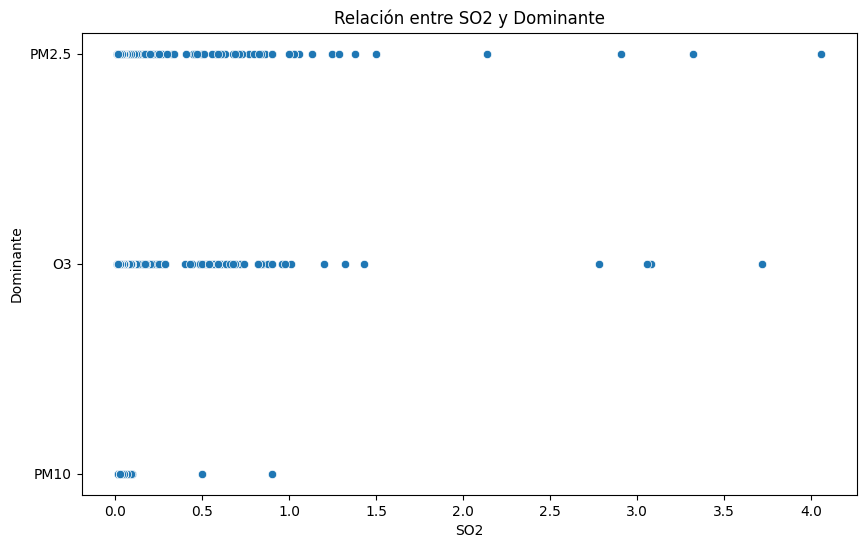

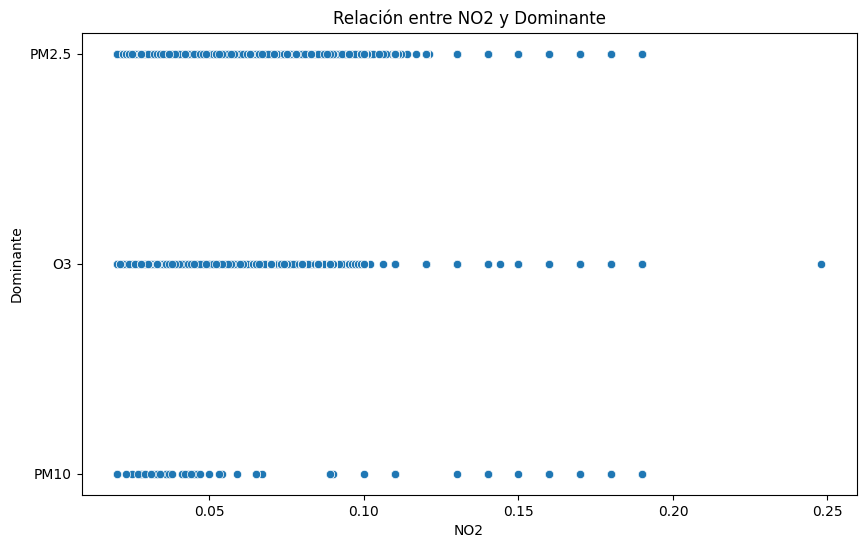

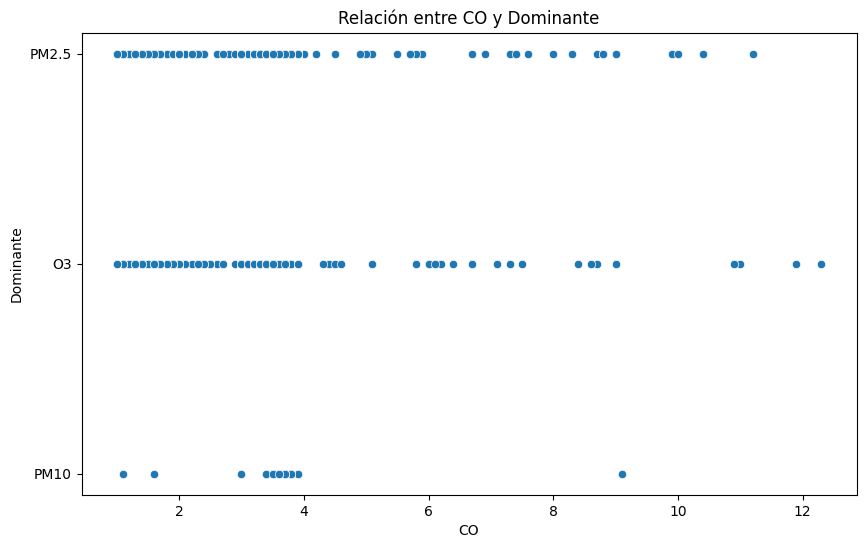

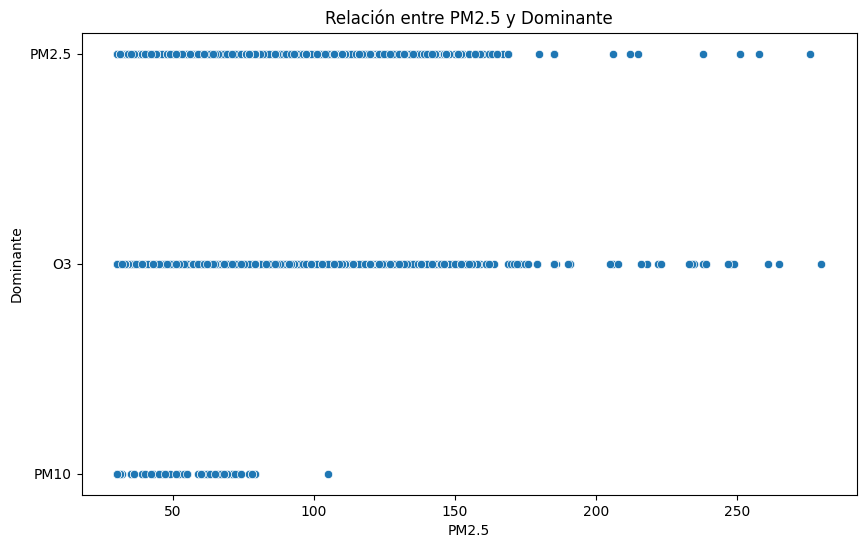

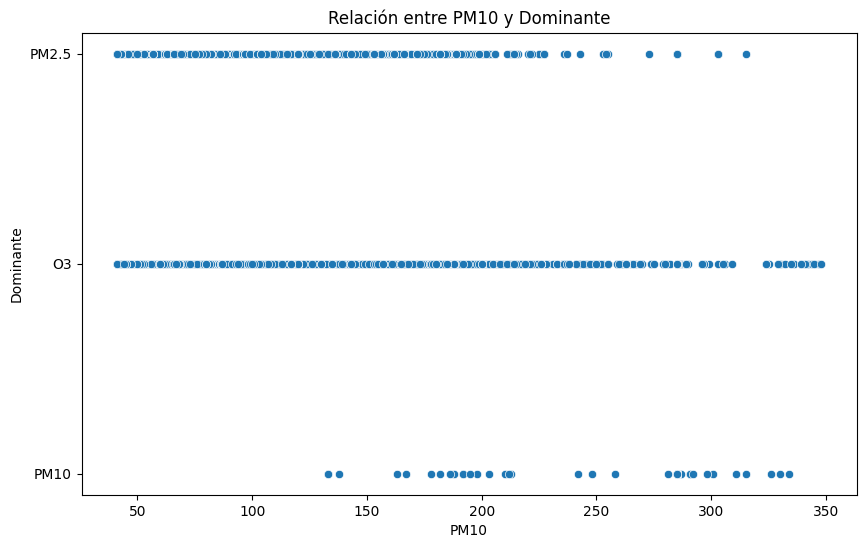

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

predictor_vars = ['SO2', 'NO2', 'CO', 'PM2.5', 'PM10']
target_var = 'Dominante'

for var in predictor_vars:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=var, y=target_var, data=data)
    plt.title(f'Relación entre {var} y Dominante')
    plt.xlabel(var)
    plt.ylabel('Dominante')
    plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

### 2.1 Prepare Features and Target Variable

We will use the air pollutant concentrations as features (X) and the 'Dominante' column as the target variable (y). Since 'Dominante' is a categorical string, we need to encode it into numerical labels.

In [15]:
# Define features (X) and target (y)
features = ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']
X = data[features]
y = data['Dominante']

# Encode the target variable 'Dominante'
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Original 'Dominante' categories:", le.classes_)
print("Encoded 'Dominante' labels (first 5):")
print(y_encoded[:5])

Original 'Dominante' categories: ['O3' 'PM10' 'PM2.5']
Encoded 'Dominante' labels (first 5):
[2 2 2 2 2]


### 2.2 Split Data into Training and Testing Sets

We'll split the data into 80% for training and 20% for testing to evaluate the model's performance on unseen data.

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

Training set size: 124324 samples
Testing set size: 31081 samples


### 2.3 Train the Random Forest Classifier

Now, we'll initialize and train a Random Forest Classifier model.

In [18]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


### 2.4 Evaluate the Model

Finally, we'll make predictions on the test set and calculate the accuracy of the model.

In [19]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9997


### 2.5 Confusion Matrix

Let's visualize the confusion matrix to understand the model's classification performance for each class.

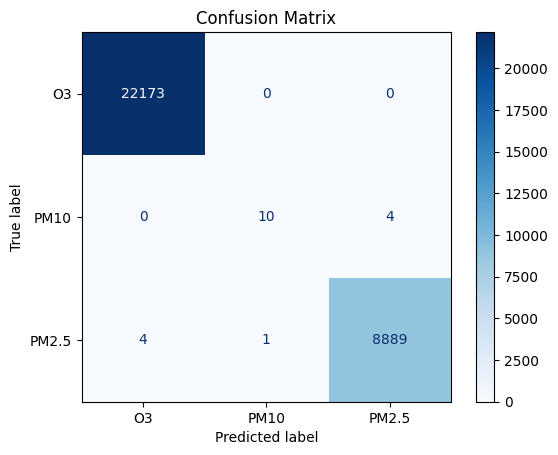

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the class labels from the LabelEncoder
class_names = le.classes_

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### 2.6 ROC Curve and AUC Score

Now, let's create the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) for each class. This helps assess the model's ability to distinguish between classes.

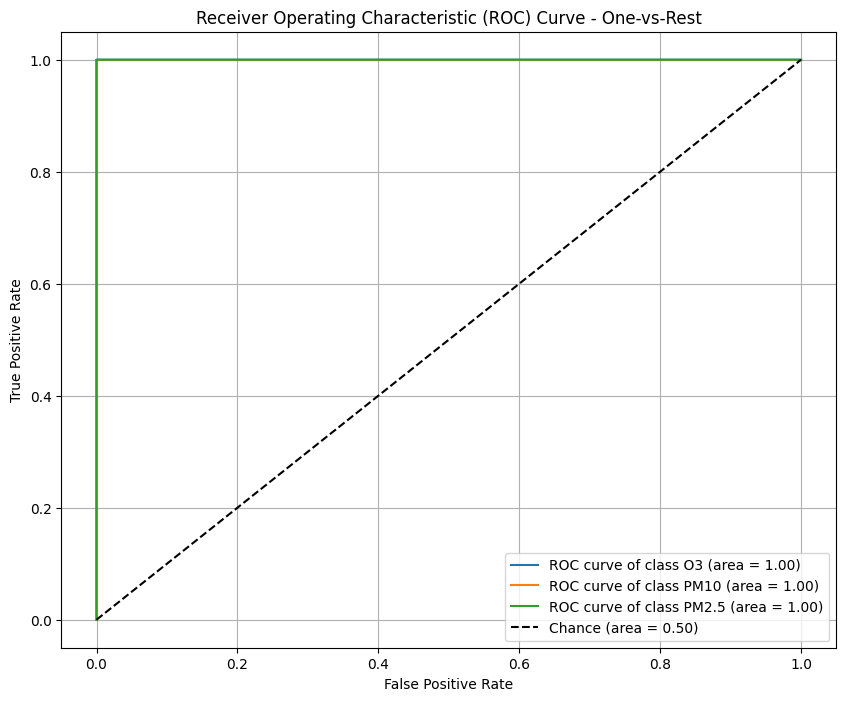

In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the true labels for one-vs-rest ROC calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y_encoded))
n_classes = y_test_bin.shape[1]

# Get probability predictions for each class
y_score = rf_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance (area = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - One-vs-Rest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()